In [2]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.charts import HeatMap
from pyecharts.globals import ThemeType as t
import seaborn as sns
import matplotlib
# %matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
pd.set_option("display.max_column",None)
pd.set_option("display.max_row",None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
filename =r'C:\Users\crz\Downloads\lolgaoduanduijushuju\high_diamond_ranked_10min.csv'
df =pd.read_csv(filename, encoding="utf-8")
df.head(5)

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0          9           6           11                  0            0   
1          5           5            5                  0            0   
2          7          11            4                  1            1   
3          4           5            5                  1            0   
4          6           6            6                  0            0   

   blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  \
0            0                    0          17210           6.6   
1            0                    0          14712           6.6   
2            0                    0          16113           6.4   
3            1                    0          15157           7.0   
4            0                    0          16400           7.0   

   blueTotalExperience  blueTotalMinionsKilled  blueTotalJungleMinionsKilled  \
0                17039                     195                            36   
1                16265                     174                            43   
2                16221                     186                            46   
3                17954                     201                            55   
4                18543                     210                            57   

   blueGoldDiff  blueExperienceDiff  blueCSPerMin  blueGoldPerMin  \
0           643                  -8          19.5          1721.0   
1         -2908               -1173          17.4          1471.2   
2         -1172               -1033          18.6          1611.3   
3         -1321                  -7          20.1          1515.7   
4         -1004                 230          21.0          1640.0   

   redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  \
0              15                  6              0         6          9   
1              12                  1              1         5          5   
2              15                  3              1        11          7   
3              15                  2              1         5          4   
4              17                  2              1         6          6   

   redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  \
0           8                 0           0           0                   0   
1           2                 2           1           1                   1   
2          14                 0           0           0                   0   
3          10                 0           0           0                   0   
4           7                 1           1           0                   0   

   redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0         16567          6.8               17047                    197   
1         17620          6.8               17438                    240   
2         17285          6.8               17254                    203   
3         16478          7.0               17961                    235   
4         17404          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4   

In [4]:
df.shape

(9879, 40)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol

In [7]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [8]:
df_blue = df[['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin',]]
df_blue.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0          9           6           11                  0            0   
1          5           5            5                  0            0   
2          7          11            4                  1            1   
3          4           5            5                  1            0   
4          6           6            6                  0            0   

   blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  \
0            0                    0          17210           6.6   
1            0                    0          14712           6.6   
2            0                    0          16113           6.4   
3            1                    0          15157           7.0   
4            0                    0          16400           7.0   

   blueTotalExperience  blueTotalMinionsKilled  blueTotalJungleMinionsKilled  \
0                17039                     195                            36   
1                16265                     174                            43   
2                16221                     186                            46   
3                17954                     201                            55   
4                18543                     210                            57   

   blueGoldDiff  blueExperienceDiff  blueCSPerMin  blueGoldPerMin  
0           643                  -8          19.5          1721.0  
1         -2908               -1173          17.4          1471.2  
2         -1172               -1033          18.6          1611.3  
3         -1321                  -7          20.1          1515.7  
4         -1004                 230          21.0          1640.0

In [9]:
data = df_blue.drop(['gameId','blueWins'], axis=1).corr()
data.head()

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
blueWardsPlaced            1.000000            0.034447        0.003228   
blueWardsDestroyed         0.034447            1.000000        0.017717   
blueFirstBlood             0.003228            0.017717        1.000000   
blueKills                  0.018138            0.033748        0.269425   
blueDeaths                -0.002612           -0.073182       -0.247929   

                    blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
blueWardsPlaced      0.018138   -0.002612     0.033217           0.019892   
blueWardsDestroyed   0.033748   -0.073182     0.067793           0.041700   
blueFirstBlood       0.269425   -0.247929     0.229485           0.151603   
blueKills            1.000000    0.004044     0.813667           0.178540   
blueDeaths           0.004044    1.000000    -0.026372          -0.204764   

                    blueDragons  blueHeralds  blueTowersDestroyed  \
blueWardsPlaced        0.017676     0.010104             0.009462   
blueWardsDestroyed     0.040504     0.016940            -0.009150   
blueFirstBlood         0.134309     0.077509             0.083316   
blueKills              0.170436     0.076195             0.180314   
blueDeaths            -0.188852    -0.095527            -0.071441   

                    blueTotalGold  blueAvgLevel  blueTotalExperience  \
blueWardsPlaced          0.019725      0.034349             0.031719   
blueWardsDestroyed       0.060054      0.060294             0.067462   
blueFirstBlood           0.312058      0.177617             0.190365   
blueKills                0.888751      0.434867             0.472155   
blueDeaths              -0.162572     -0.414755            -0.460122   

                    blueTotalMinionsKilled  blueTotalJungleMinionsKilled  \
blueWardsPlaced                  -0.033925                      0.010501   
blueWardsDestroyed                0.111028                     -0.023452   
blueFirstBlood                    0.125642                      0.018190   
blueKills                        -0.030880                     -0.112506   
blueDeaths                       -0.468560                     -0.228102   

                    blueGoldDiff  blueExperienceDiff  blueCSPerMin  \
blueWardsPlaced         0.015800            0.027943     -0.033925   
blueWardsDestroyed      0.078585            0.077946      0.111028   
blueFirstBlood          0.378511            0.240665      0.125642   
blueKills               0.654148            0.583730     -0.030880   
blueDeaths             -0.640000           -0.577613     -0.468560   

                    blueGoldPerMin  
blueWardsPlaced           0.019725  
blueWardsDestroyed        0.060054  
blueFirstBlood            0.312058  
blueKills                 0.888751  
blueDeaths               -0.162572

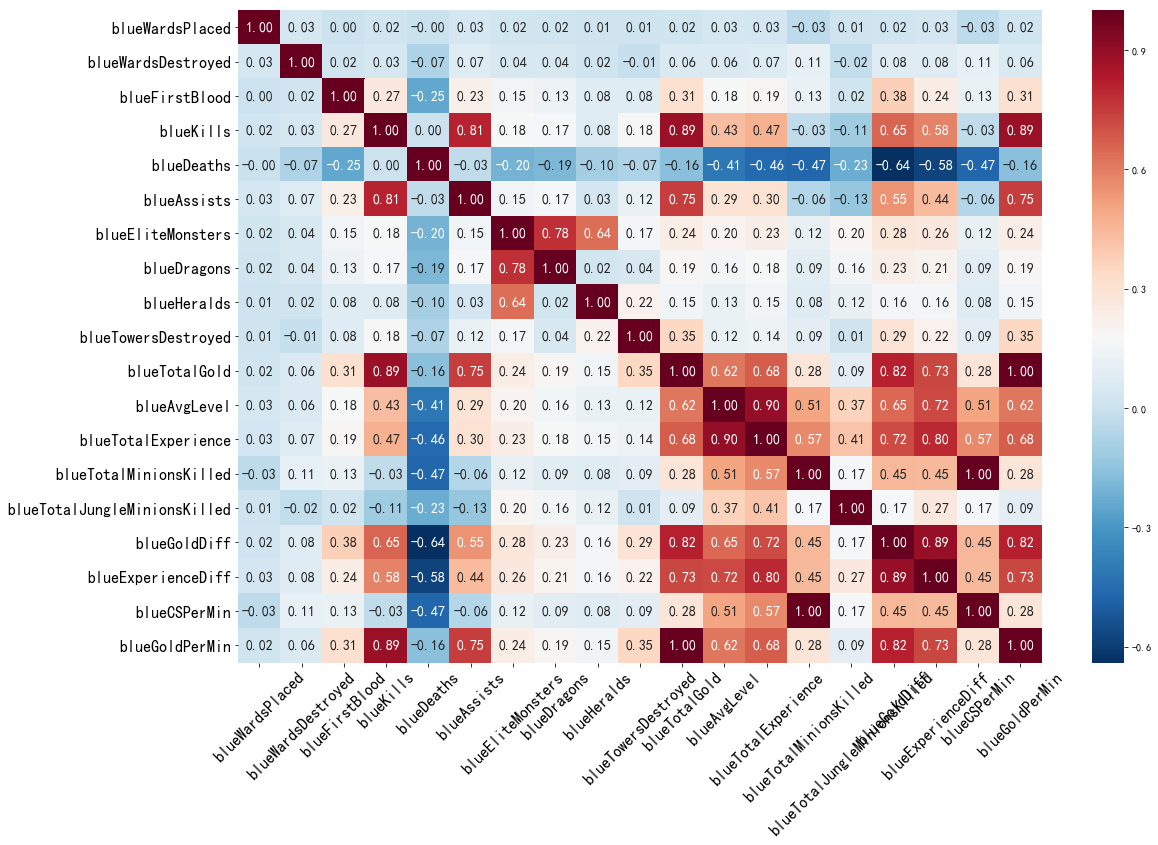

In [10]:
# 热力图体现相关性做法一：
plt.figure(figsize=(18, 12),)
sns.heatmap(data, cmap='RdBu_r', annot=True, fmt='.2f',annot_kws={'fontsize':14})
plt.tick_params(axis='x',which='major',labelsize=16,labelrotation=45)
plt.tick_params(axis='y',which='major',labelsize=16)

In [11]:
from itertools import chain 
list1=list(chain(*data.values.tolist()))

In [12]:
k = np.round(list1,2)
list2=[[i,j,k[i*19 + j]]for i in range(19) for j in range(19)]

In [13]:
# 热力图体现相关性做法二：
heat = HeatMap(init_opts=opts.InitOpts(theme="chalk"))
heat.add_xaxis(data.index.tolist())
heat.add_yaxis("", data.index.tolist(),list2)
heat.set_global_opts(title_opts=opts.TitleOpts(title="blue_team各种功能相关性热力图",pos_left='center'),
                     visualmap_opts=opts.VisualMapOpts(min_=-1,max_=1,orient='horizontal',pos_left='right'))

heat.render_notebook()

In [14]:
tata=df[df_blue.columns[2:]].apply(lambda x: x.corr(df_blue['blueWins']))
tata.sort_values()

blueDeaths                     -0.339297
blueWardsPlaced                 0.000087
blueWardsDestroyed              0.044247
blueHeralds                     0.092385
blueTowersDestroyed             0.115566
blueTotalJungleMinionsKilled    0.131445
blueFirstBlood                  0.201769
blueDragons                     0.213768
blueEliteMonsters               0.221944
blueTotalMinionsKilled          0.224909
blueCSPerMin                    0.224909
blueAssists                     0.276685
blueKills                       0.337358
blueAvgLevel                    0.357820
blueTotalExperience             0.396141
blueGoldPerMin                  0.417213
blueTotalGold                   0.417213
blueExperienceDiff              0.489558
blueGoldDiff                    0.511119
dtype: float64

In [15]:
blue_cor=Bar(init_opts=opts.InitOpts(theme="chalk"))
blue_cor.add_xaxis(list(tata.sort_values().index))
blue_cor.add_yaxis('',np.round(tata.sort_values().values,2).tolist())
# blue_cor.reversal_axis()
blue_cor.set_global_opts(title_opts=opts.TitleOpts(title="蓝队是否胜局与其他指标的相关系数对比",pos_left='center'),
                               xaxis_opts=opts.AxisOpts(name="功能"),
                              yaxis_opts=opts.AxisOpts(name="相关系数"))
blue_cor.render_notebook()

In [16]:
tata=df[df_blue.columns[2:]].apply(lambda x: x.corr(df_blue['blueWins']))
tata.sort_values()

blueDeaths                     -0.339297
blueWardsPlaced                 0.000087
blueWardsDestroyed              0.044247
blueHeralds                     0.092385
blueTowersDestroyed             0.115566
blueTotalJungleMinionsKilled    0.131445
blueFirstBlood                  0.201769
blueDragons                     0.213768
blueEliteMonsters               0.221944
blueTotalMinionsKilled          0.224909
blueCSPerMin                    0.224909
blueAssists                     0.276685
blueKills                       0.337358
blueAvgLevel                    0.357820
blueTotalExperience             0.396141
blueGoldPerMin                  0.417213
blueTotalGold                   0.417213
blueExperienceDiff              0.489558
blueGoldDiff                    0.511119
dtype: float64

In [17]:
cols =[]
for i in tata.index:
    if(tata[i]<0.25 and tata[i]>-0.25):
        cols.append(i)
df1 = df_blue.copy()
df1.drop(cols, axis = 1, inplace= True)
df1.head()

gameId  blueWins  blueKills  blueDeaths  blueAssists  blueTotalGold  \
0  4519157822         0          9           6           11          17210   
1  4523371949         0          5           5            5          14712   
2  4521474530         0          7          11            4          16113   
3  4524384067         0          4           5            5          15157   
4  4436033771         0          6           6            6          16400   

   blueAvgLevel  blueTotalExperience  blueGoldDiff  blueExperienceDiff  \
0           6.6                17039           643                  -8   
1           6.6                16265         -2908               -1173   
2           6.4                16221         -1172               -1033   
3           7.0                17954         -1321                  -7   
4           7.0                18543         -1004                 230   

   blueGoldPerMin  
0          1721.0  
1          1471.2  
2          1611.3  
3          1515.7  
4          1640.0

In [18]:
df1.columns

Index(['gameId', 'blueWins', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff',
       'blueExperienceDiff', 'blueGoldPerMin'],
      dtype='object')

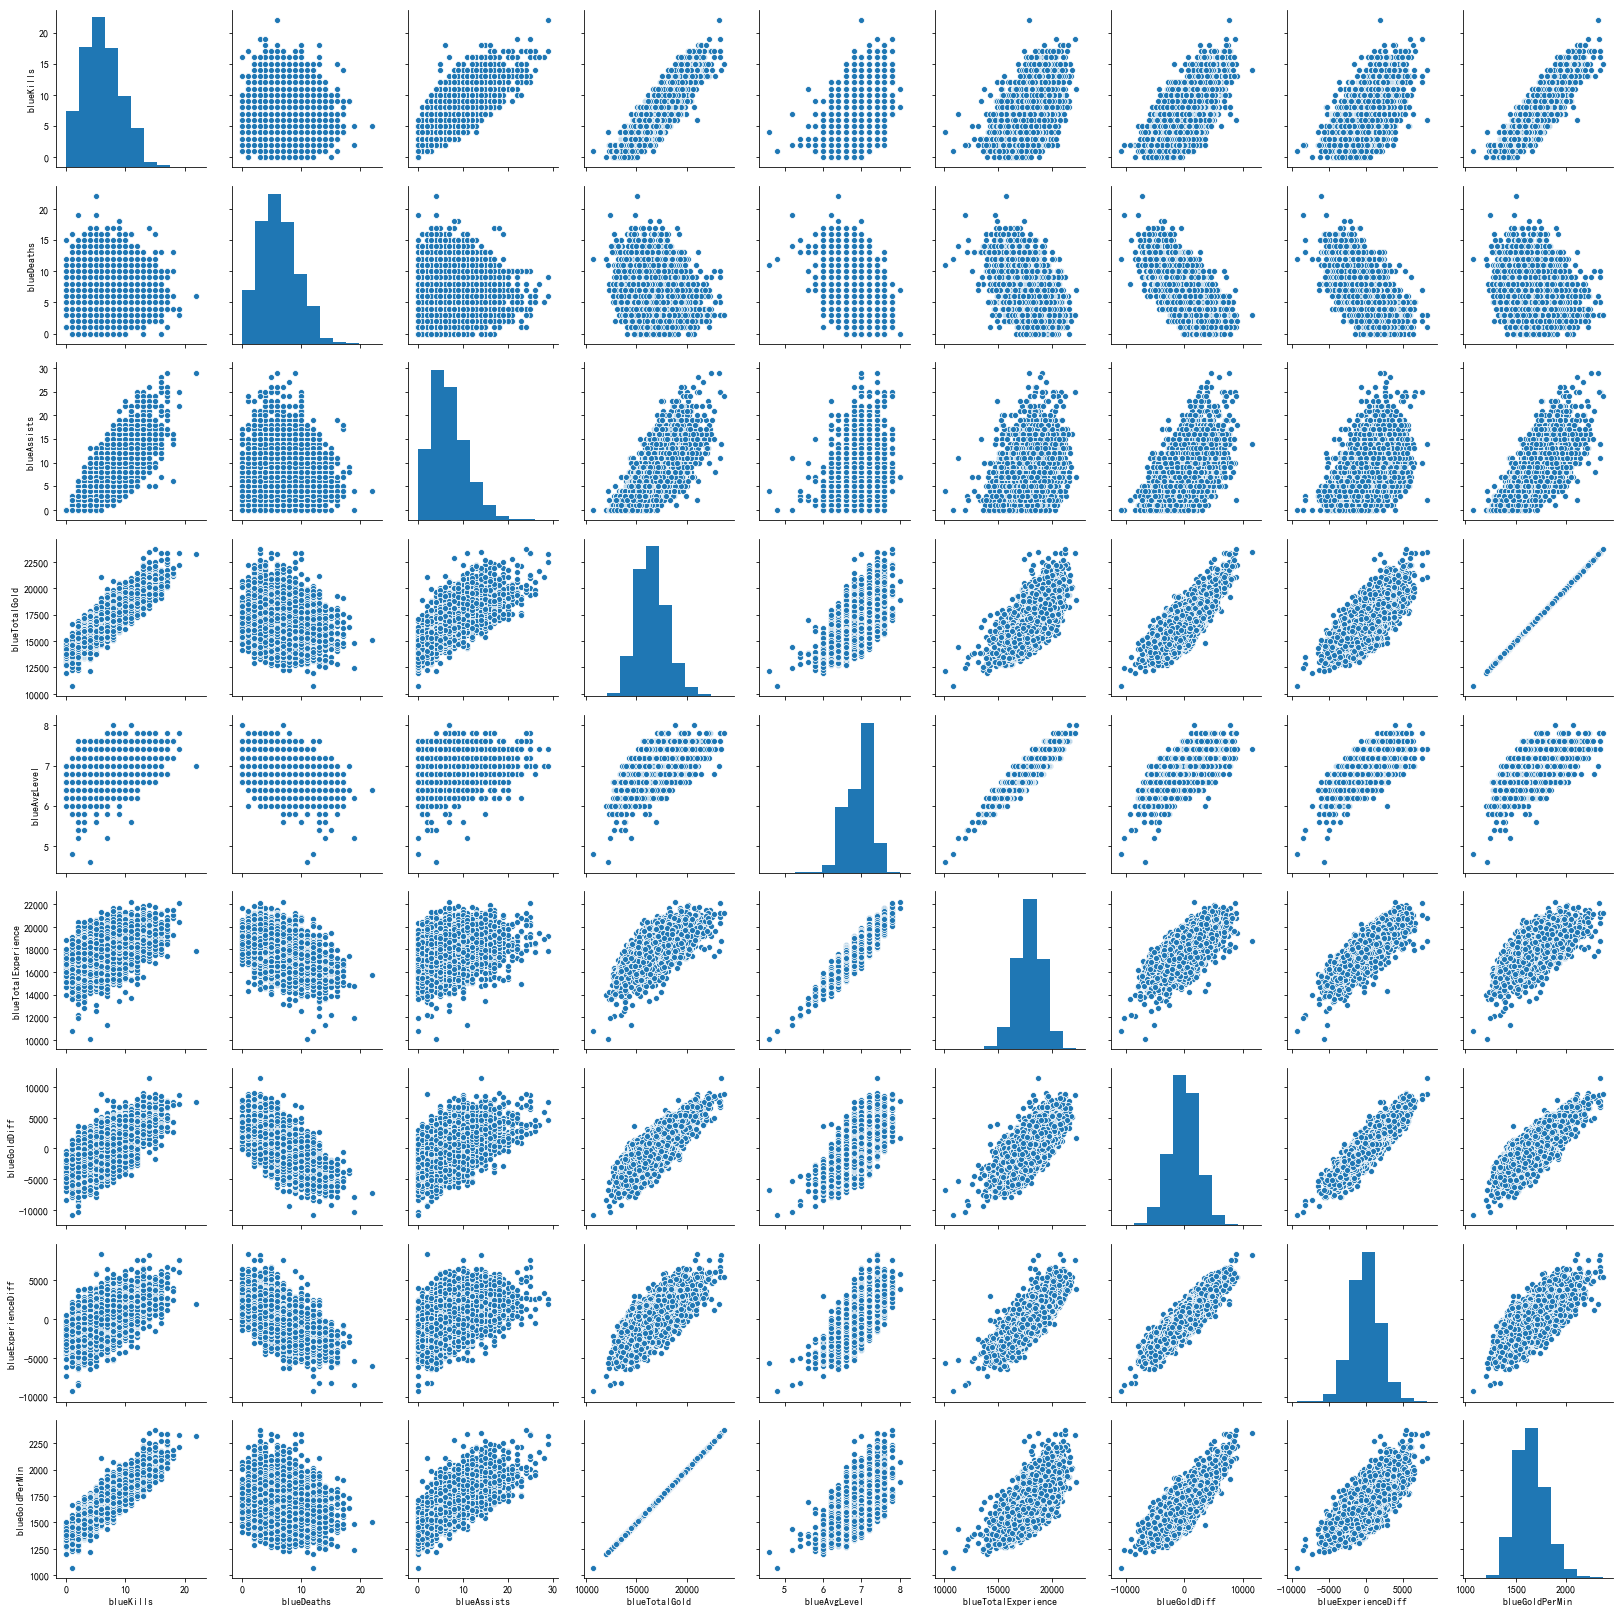

In [19]:
sns.pairplot(df1[['blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff',
       'blueExperienceDiff', 'blueGoldPerMin']])

In [20]:
data1 = df1.drop(['gameId','blueWins'], axis=1).corr()
data1

blueKills  blueDeaths  blueAssists  blueTotalGold  \
blueKills             1.000000    0.004044     0.813667       0.888751   
blueDeaths            0.004044    1.000000    -0.026372      -0.162572   
blueAssists           0.813667   -0.026372     1.000000       0.748352   
blueTotalGold         0.888751   -0.162572     0.748352       1.000000   
blueAvgLevel          0.434867   -0.414755     0.292661       0.616968   
blueTotalExperience   0.472155   -0.460122     0.303022       0.676193   
blueGoldDiff          0.654148   -0.640000     0.549761       0.816803   
blueExperienceDiff    0.583730   -0.577613     0.437002       0.729345   
blueGoldPerMin        0.888751   -0.162572     0.748352       1.000000   

                     blueAvgLevel  blueTotalExperience  blueGoldDiff  \
blueKills                0.434867             0.472155      0.654148   
blueDeaths              -0.414755            -0.460122     -0.640000   
blueAssists              0.292661             0.303022      0.549761   
blueTotalGold            0.616968             0.676193      0.816803   
blueAvgLevel             1.000000             0.901297      0.653538   
blueTotalExperience      0.901297             1.000000      0.717968   
blueGoldDiff             0.653538             0.717968      1.000000   
blueExperienceDiff       0.718822             0.800815      0.894729   
blueGoldPerMin           0.616968             0.676193      0.816803   

                     blueExperienceDiff  blueGoldPerMin  
blueKills                      0.583730        0.888751  
blueDeaths                    -0.577613       -0.162572  
blueAssists                    0.437002        0.748352  
blueTotalGold                  0.729345        1.000000  
blueAvgLevel                   0.718822        0.616968  
blueTotalExperience            0.800815        0.676193  
blueGoldDiff                   0.894729        0.816803  
blueExperienceDiff             1.000000        0.729345  
blueGoldPerMin                 0.729345        1.000000

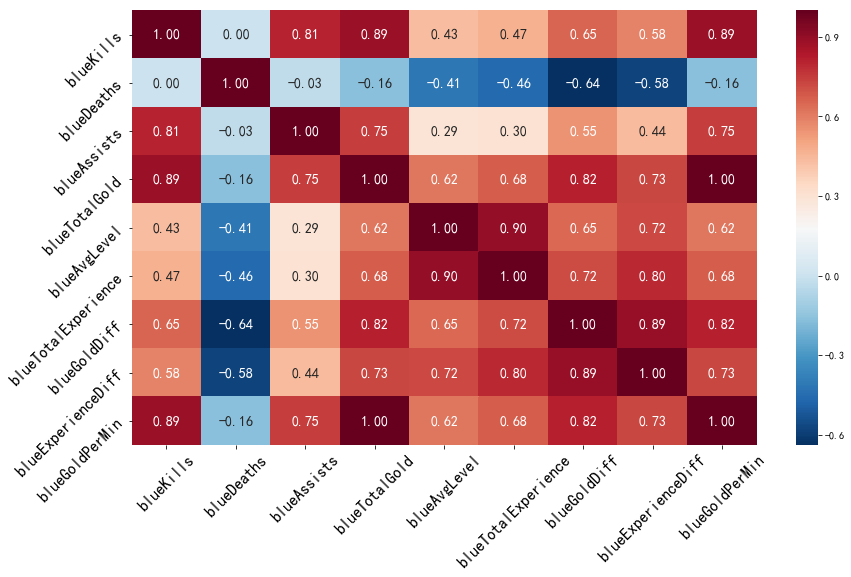

In [21]:
plt.figure(figsize=(14, 8), )
sns.heatmap(data1, cmap='RdBu_r', annot=True, fmt='.2f', annot_kws={'fontsize':14})
plt.tick_params(axis='x', which='major', labelsize=16, labelrotation=45)
plt.tick_params(axis='y', which='major', labelsize=16, labelrotation=45)

In [22]:
df1_blue1=df1[df1['blueWins'] == 1][['blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff',
       'blueExperienceDiff', 'blueGoldPerMin']].mean()
np.round(df1_blue1.values,2).tolist()

[7.2, 5.14, 7.77, 17145.26, 7.03, 18404.58, 1270.72, 908.27, 1714.53]

In [23]:
df1_blue0 = df1[df1['blueWins'] ==0][['blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff',
       'blueExperienceDiff', 'blueGoldPerMin']].mean()
np.round(df1_blue0.values,2).tolist()

[5.17, 7.13, 5.52, 15864.11, 6.81, 17453.47, -1237.07, -971.9, 1586.41]

In [26]:
df1[df1['blueWins'] == 1][['blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff',
       'blueExperienceDiff', 'blueGoldPerMin']].min()

blueKills                  0.0
blueDeaths                 0.0
blueAssists                0.0
blueTotalGold          12939.0
blueAvgLevel               6.0
blueTotalExperience    14181.0
blueGoldDiff           -6324.0
blueExperienceDiff     -4619.0
blueGoldPerMin          1293.9
dtype: float64

In [27]:
df1[df1['blueWins'] == 1][['blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff',
       'blueExperienceDiff', 'blueGoldPerMin']].max()

blueKills                 22.0
blueDeaths                17.0
blueAssists               29.0
blueTotalGold          23701.0
blueAvgLevel               8.0
blueTotalExperience    22125.0
blueGoldDiff           11467.0
blueExperienceDiff      8348.0
blueGoldPerMin          2370.1
dtype: float64

In [28]:
from pyecharts.charts import Radar
data = [
    [7.2, 5.14, 7.77, 17145.26, 7.03, 18404.58, 1270.72, 908.27, 1714.53],
    [5.17, 7.13, 5.52, 15864.11, 6.81, 17453.47, -1237.07, -971.9, 1586.41]
]

radar1 = (Radar(init_opts=opts.InitOpts(theme="chalk",width="900px", height="500px"))
         .add_schema(schema=[
             opts.RadarIndicatorItem(name="blueKills", max_=22,min_=0),
             opts.RadarIndicatorItem(name="blueDeaths", max_=17,min_=0),
             opts.RadarIndicatorItem(name="blueAssists", max_=29,min_=0),
             opts.RadarIndicatorItem(name="blueTotalGold", max_=23701,min_=12939),
             opts.RadarIndicatorItem(name="blueAvgLevel", max_=8,min_=6),
             opts.RadarIndicatorItem(name="blueTotalExperience", max_=22125,min_=14181),
             opts.RadarIndicatorItem(name="blueGoldDiff", max_=11467,min_=-6324),
             opts.RadarIndicatorItem(name="blueExperienceDiff", max_=8348,min_=-4619),
             opts.RadarIndicatorItem(name="blueGoldPerMin", max_=2370.1,min_=1293),
         ]
)
          .add('', data)
    .set_series_opts(label_opts=opts.LabelOpts())
    .set_global_opts(title_opts=opts.TitleOpts(title=""),
                     legend_opts=opts.LegendOpts(orient='vertical',pos_left='right',pos_top='5%'))
)
radar1.render_notebook()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x = df1.drop(["gameId","blueWins"], axis=1)
y = df1['blueWins']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [30]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((7409, 9), (7409,), (2470, 9), (2470,))

In [31]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
acc_lr = accuracy_score(pred_lr, y_test)
print("Logistic Regression模型训练集的准确率：%.3f" %lr.score(x_train, y_train))
print("Logistic Regression模型测试集的准确率：%.3f" %lr.score(x_test, y_test))
print("Logistic Regression模型正确率：%.3f" %acc_lr)

Logistic Regression模型训练集的准确率：0.728
Logistic Regression模型测试集的准确率：0.729
Logistic Regression模型正确率：0.729


In [32]:
#决策树
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
acc_dt = accuracy_score(pred_dt, y_test)
print("DecisionTreeRegressor模型训练集的准确率：%.3f" %dt.score(x_train, y_train))
print("DecisionTreeRegressor模型测试集的准确率：%.3f" %dt.score(x_test, y_test))
print("DecisionTreeRegressor模型正确率：%.3f" %acc_dt)

DecisionTreeRegressor模型训练集的准确率：1.000
DecisionTreeRegressor模型测试集的准确率：0.642
DecisionTreeRegressor模型正确率：0.642


In [33]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(pred_rf, y_test)
print("DecisionTreeRegressor模型训练集的准确率：%.3f" %rf.score(x_train, y_train))
print("DecisionTreeRegressor模型测试集的准确率：%.3f" %rf.score(x_test, y_test))
print("DecisionTreeRegressor模型正确率：%.3f" %acc_rf)

D:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


DecisionTreeRegressor模型训练集的准确率：0.982
DecisionTreeRegressor模型测试集的准确率：0.686
DecisionTreeRegressor模型正确率：0.686


In [34]:
# K近邻
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier() 
knc.fit(x_train,y_train) 
pred_knc =knc.predict(x_test) 
acc_knc = accuracy_score(pred_knc, y_test)
print("KNeighborsClassifier模型训练集的准确率：%.3f" %knc.score(x_train, y_train))
print("KNeighborsClassifier模型测试集的准确率：%.3f" %knc.score(x_test, y_test))
print("KNeighborsClassifier模型正确率：%.3f" %acc_knc)

KNeighborsClassifier模型训练集的准确率：0.786
KNeighborsClassifier模型测试集的准确率：0.689
KNeighborsClassifier模型正确率：0.689


In [35]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, pred_lr, target_names = ['0','1'])
print(cr)

             precision    recall  f1-score   support

          0       0.73      0.74      0.73      1246
          1       0.73      0.72      0.73      1224

avg / total       0.73      0.73      0.73      2470

